In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 0. Load Data

In [2]:
data = pd.read_csv('../data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## 1. Data Analysis: First Sight

### How is the date distribuited?

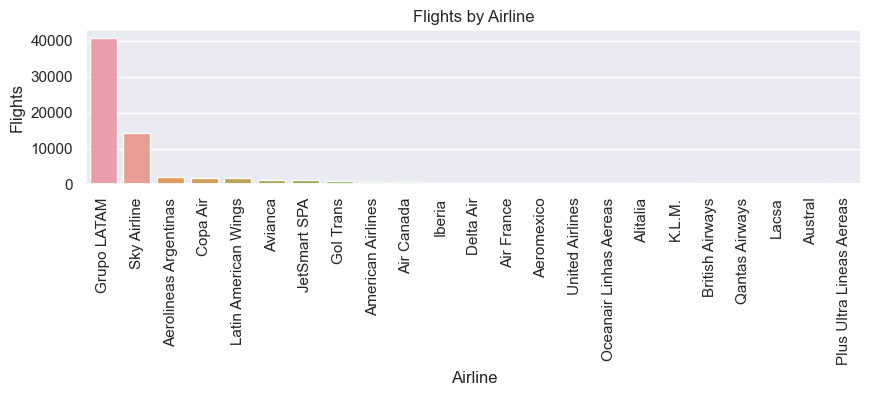

In [3]:
flights_by_airline = data['OPERA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=flights_by_airline.index, y=flights_by_airline.values, alpha=0.9)
plt.title('Flights by Airline')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

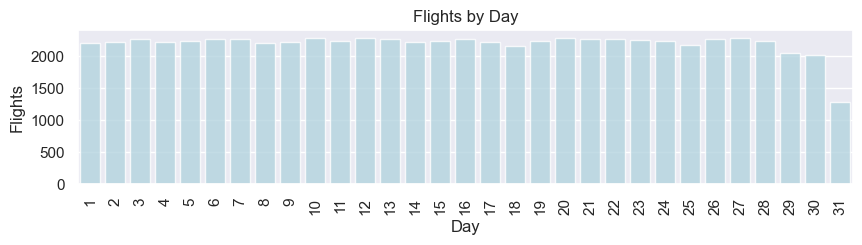

In [4]:
flights_by_day = data['DIA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(x=flights_by_day.index, y=flights_by_day.values, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation=90)
plt.show()

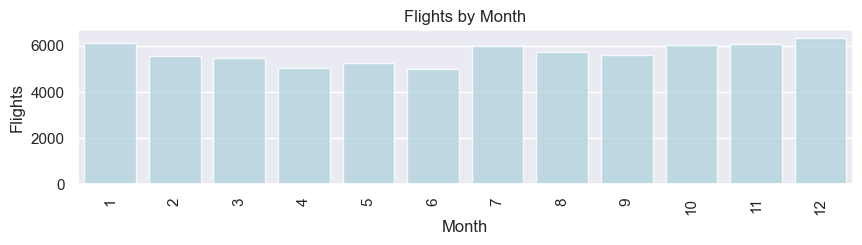

In [5]:
flights_by_month = data['MES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, color = 'lightblue', alpha=0.8)
plt.title('Flights by Month')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.show()

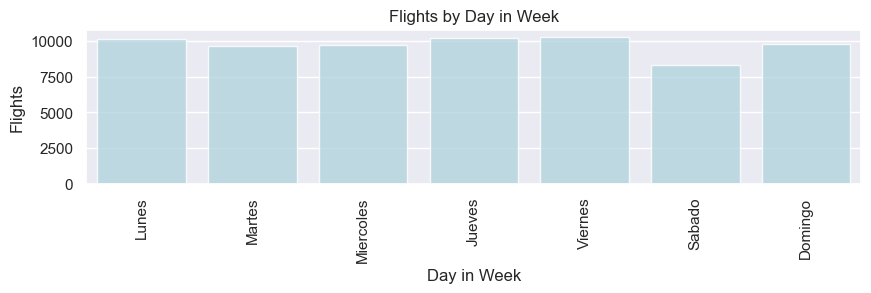

In [6]:
flights_by_day_in_week = data['DIANOM'].value_counts()
days = [
    flights_by_day_in_week.index[2], 
    flights_by_day_in_week.index[5], 
    flights_by_day_in_week.index[4], 
    flights_by_day_in_week.index[1], 
    flights_by_day_in_week.index[0], 
    flights_by_day_in_week.index[6], 
    flights_by_day_in_week.index[3]
]
values_by_day = [
    flights_by_day_in_week.values[2], 
    flights_by_day_in_week.values[5], 
    flights_by_day_in_week.values[4], 
    flights_by_day_in_week.values[1], 
    flights_by_day_in_week.values[0], 
    flights_by_day_in_week.values[6], 
    flights_by_day_in_week.values[3]
]
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=days, y=values_by_day, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day in Week')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day in Week', fontsize=12)
plt.xticks(rotation=90)
plt.show()

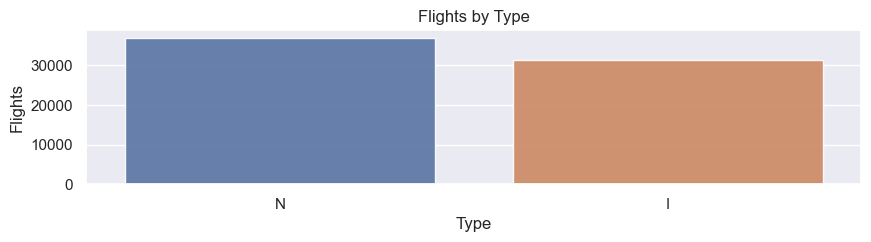

In [7]:
flights_by_type = data['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize = (10, 2))
sns.barplot(x=flights_by_type.index, y=flights_by_type.values, alpha=0.9)
plt.title('Flights by Type')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

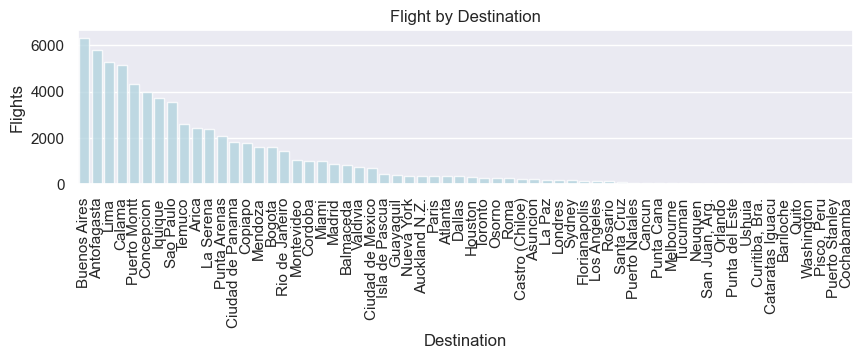

In [8]:
flight_by_destination = data['SIGLADES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_by_destination.index, y=flight_by_destination.values, color = 'lightblue', alpha=0.8)
plt.title('Flight by Destination')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)

plt.show()

## 2. Features Generation

### 2.a. Period of Day

In [9]:
from datetime import datetime

def get_period_day(date):
    date_time = datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time()
    morning_min = datetime.strptime("05:00", '%H:%M').time()
    morning_max = datetime.strptime("11:59", '%H:%M').time()
    afternoon_min = datetime.strptime("12:00", '%H:%M').time()
    afternoon_max = datetime.strptime("18:59", '%H:%M').time()
    evening_min = datetime.strptime("19:00", '%H:%M').time()
    evening_max = datetime.strptime("23:59", '%H:%M').time()
    night_min = datetime.strptime("00:00", '%H:%M').time()
    night_max = datetime.strptime("4:59", '%H:%M').time()
    
    if(date_time >= morning_min and date_time <= morning_max):
        return 'mañana'
    elif(date_time >= afternoon_min and date_time <= afternoon_max):
        return 'tarde'
    elif(
        (date_time >= evening_min and date_time <= evening_max) or
        (date_time >= night_min and date_time <= night_max)
    ):
        return 'noche'

In [10]:
data['period_day'] = data['Fecha-I'].apply(get_period_day)

In [11]:
# Relative frequency of period day
data['period_day'].value_counts(normalize=True).round(3)*100

period_day
tarde     37.4
mañana    37.2
noche     25.4
Name: proportion, dtype: float64

In [12]:
data['period_day'].isnull().sum()

0

### 2.b. High Season

In [13]:
from datetime import datetime

def is_high_season(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0

In [14]:
data['high_season'] = data['Fecha-I'].apply(is_high_season)

In [15]:
# Relative frequency of high season flights
data['high_season'].value_counts(normalize=True).round(3)*100

high_season
0    67.7
1    32.3
Name: proportion, dtype: float64

### 2.c. Difference in Minutes

In [16]:
def get_min_diff(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    min_diff = ((fecha_o - fecha_i).total_seconds())/60
    return min_diff

In [17]:
data['min_diff'] = data.apply(get_min_diff, axis = 1)

### 2.d. Delay

In [18]:
threshold_in_minutes = 15
data['delay'] = np.where(data['min_diff'] > threshold_in_minutes, 1, 0)

In [19]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'period_day', 'high_season',
       'min_diff', 'delay'],
      dtype='object')

In [20]:
# Absolute frequency of target variable (delay)
data['delay'].value_counts()

delay
0    55592
1    12614
Name: count, dtype: int64

In [21]:
# Relative frequency of target variable (delay)
data['delay'].value_counts(normalize=True).round(3)*100

delay
0    81.5
1    18.5
Name: proportion, dtype: float64

## 3. Data Analysis: Second Sight

### How is the delay rate across columns?

In [22]:
def get_rate_from_column(data, column):
    delays = {}
    for _, row in data.iterrows():
        if row['delay'] == 1:
            if row[column] not in delays:
                delays[row[column]] = 1
            else:
                delays[row[column]] += 1
    total = data[column].value_counts().to_dict()
    
    rates = {}
    for name, total in total.items():
        if name in delays:
            rates[name] = round(total / delays[name], 2)
        else:
            rates[name] = 0
            
    return pd.DataFrame.from_dict(data = rates, orient = 'index', columns = ['Tasa (%)'])

In [23]:
def get_rate_from_column(data, column):
    # Dictionary to store the number of delays for each unique value in the column.
    delays = {}

    # Iterate over each row in the data.
    for _, row in data.iterrows():
        if row['delay'] == 1:  # Check if there's a delay.
            if row[column] not in delays:  
                delays[row[column]] = 1  # Initialize if not already in the dictionary.
            else:
                delays[row[column]] += 1  # Increment the count.

    # Get the total count for each unique value in the column.
    total = data[column].value_counts().to_dict()

    # Dictionary to store delay rates.
    rates = {}

    # Calculate delay rate for each unique value in the column.
    for name, count in total.items():
        if name in delays:
            # Calculate delay rate as a percentage.
            rates[name] = round((delays[name] / count) * 100, 2)
        else:
            rates[name] = 0  # If no delays, rate is 0.

    # Convert the rates dictionary to a DataFrame and return.
    return pd.DataFrame.from_dict(data=rates, orient='index', columns=['Tasa (%)'])


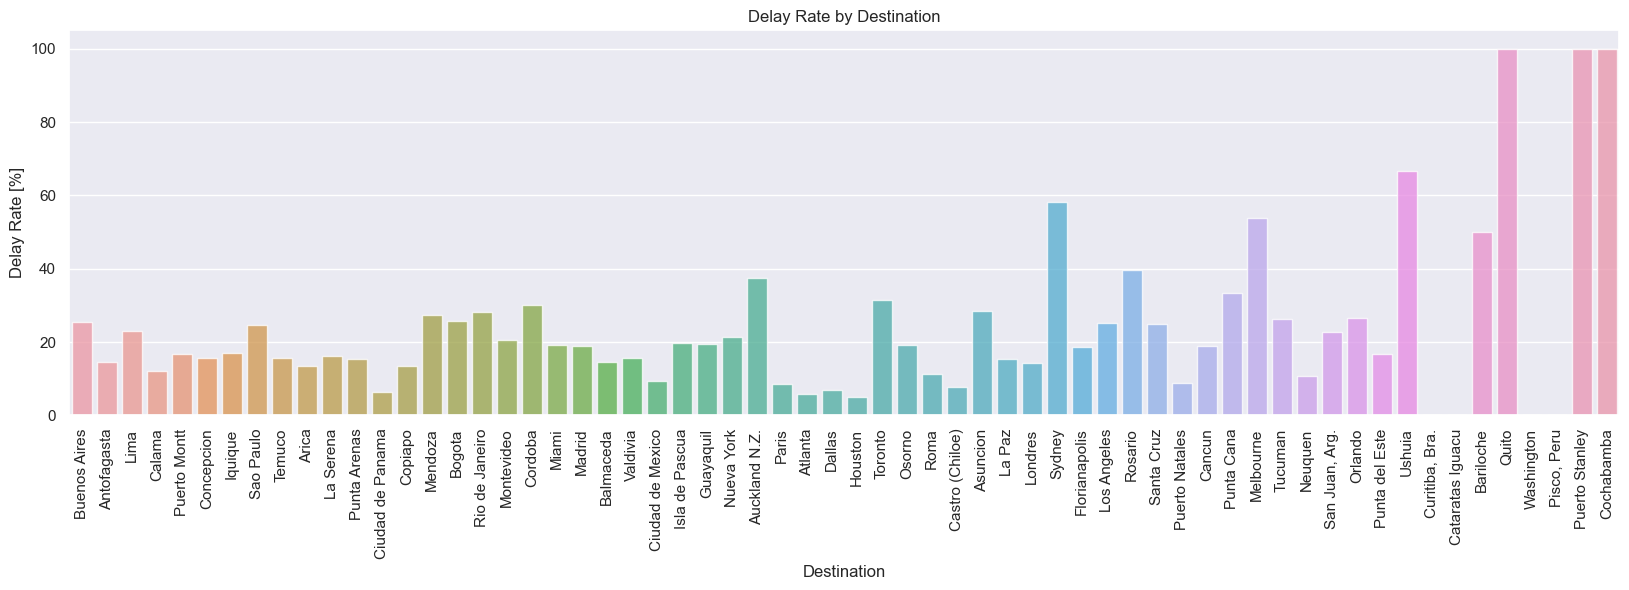

In [24]:
destination_rate = get_rate_from_column(data, 'SIGLADES')
destination_rate_values = data['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=destination_rate_values, y=destination_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Destination')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)
plt.show()


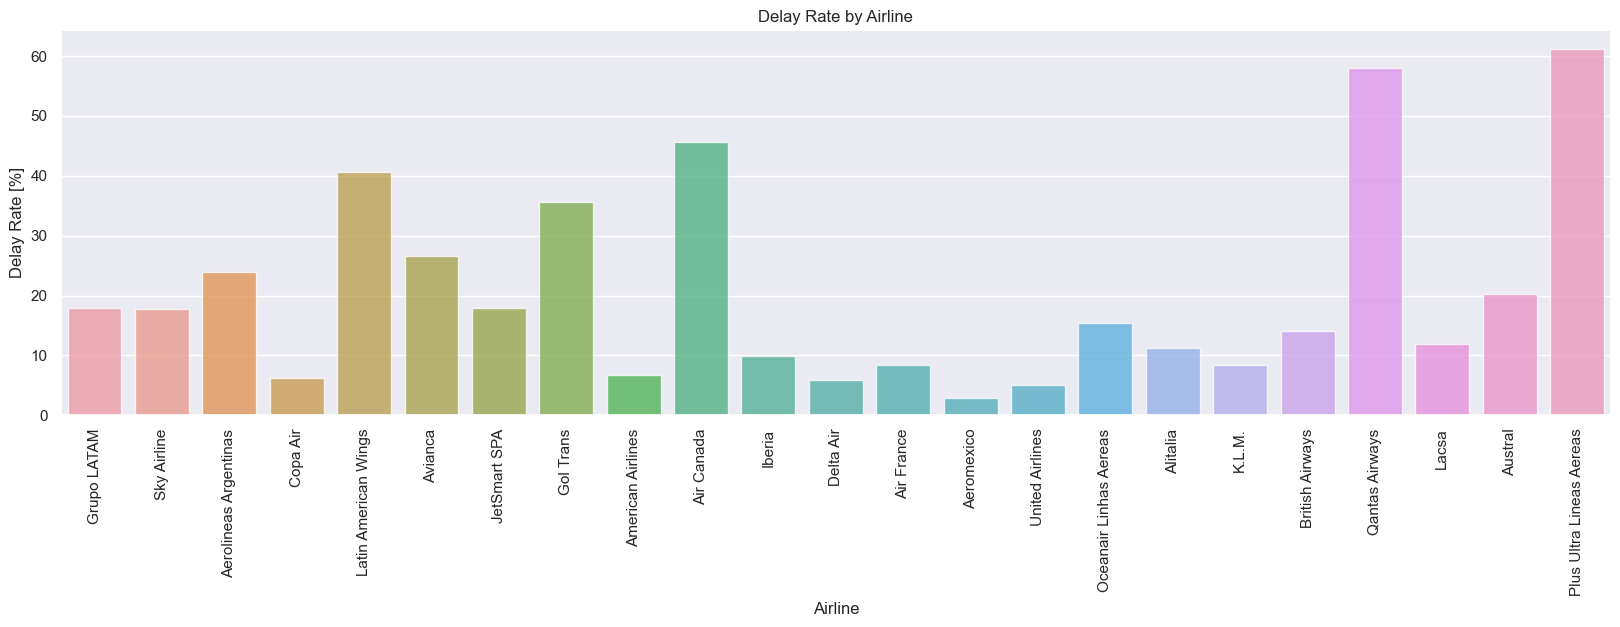

In [25]:
airlines_rate = get_rate_from_column(data, 'OPERA')
airlines_rate_values = data['OPERA'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=airlines_rate_values, y=airlines_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Airline')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [26]:
(data[data['delay'] == 1]['MES'].value_counts(normalize=True).round(3)*100).sort_index()

MES
1      7.8
2      6.7
3      5.0
4      4.6
5      6.6
6      6.8
7     13.9
8      7.9
9      7.7
10    10.8
11     9.5
12    12.8
Name: proportion, dtype: float64

In [27]:
(data[data['delay'] == 0]['MES'].value_counts(normalize=True).round(3)*100).sort_index()

MES
1     9.2
2     8.5
3     8.7
4     8.0
5     7.9
6     7.4
7     7.6
8     8.5
9     8.4
10    8.4
11    8.8
12    8.5
Name: proportion, dtype: float64

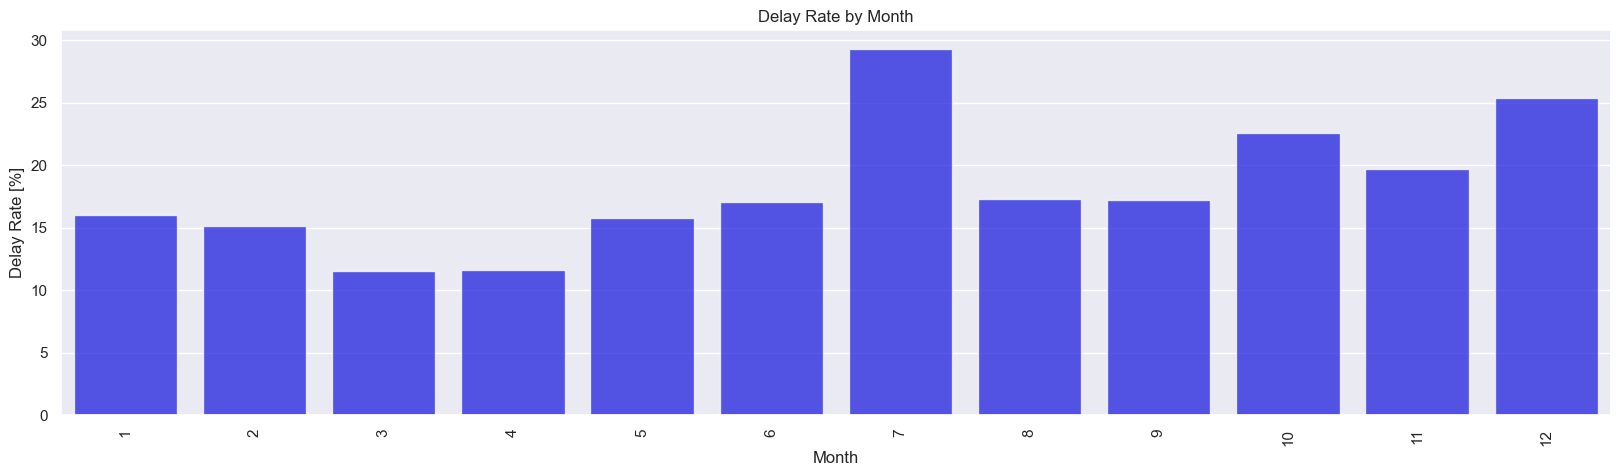

In [28]:
month_rate = get_rate_from_column(data, 'MES')
month_rate_value = data['MES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=month_rate_value, y=month_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Month')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.show()

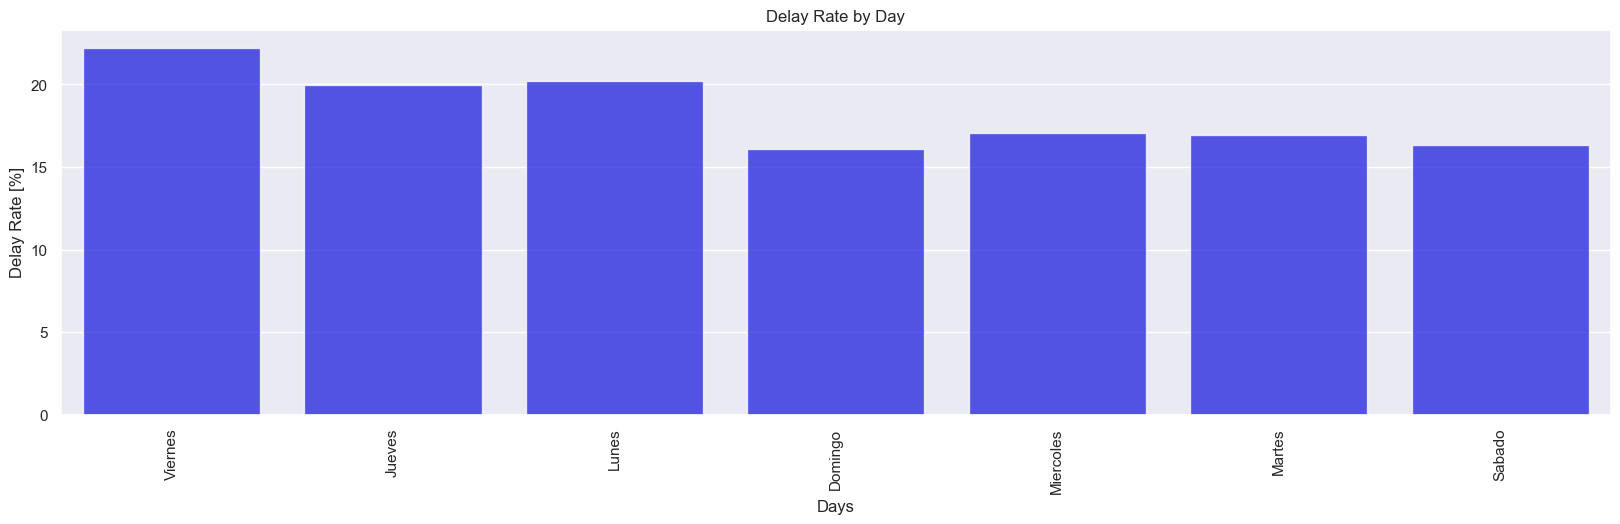

In [29]:
days_rate = get_rate_from_column(data, 'DIANOM')
days_rate_value = data['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (20, 5))
sns.barplot(x=days_rate_value, y=days_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Days', fontsize=12)
plt.xticks(rotation=90)
plt.show()

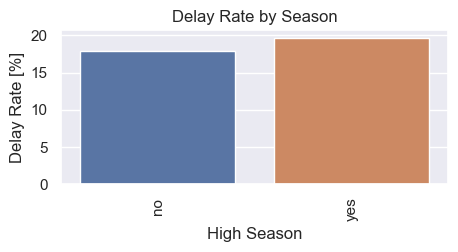

In [30]:
high_season_rate = get_rate_from_column(data, 'high_season')
high_season_rate_values = data['high_season'].value_counts().index

plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=["no", "yes"], y=high_season_rate['Tasa (%)'])
plt.title('Delay Rate by Season')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('High Season', fontsize=12)
plt.xticks(rotation=90)
plt.show()

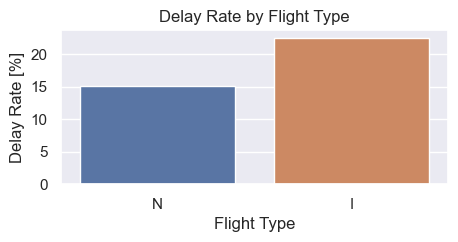

In [31]:
flight_type_rate = get_rate_from_column(data, 'TIPOVUELO')
flight_type_rate_values = data['TIPOVUELO'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_type_rate_values, y=flight_type_rate['Tasa (%)'])
plt.title('Delay Rate by Flight Type')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Flight Type', fontsize=12)
plt.show()

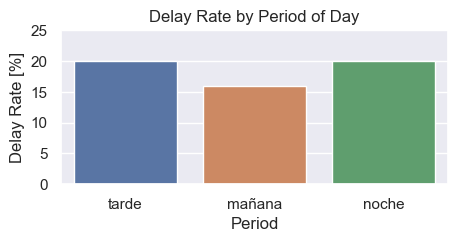

In [32]:
period_day_rate = get_rate_from_column(data, 'period_day')
period_day_rate_values = data['period_day'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=period_day_rate_values, y=period_day_rate['Tasa (%)'])
plt.title('Delay Rate by Period of Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Period', fontsize=12)
plt.ylim(0, 25)
plt.show()

## 4. Training

### 4.a. Data Split (Training and Validation)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'period_day', 'high_season',
       'min_diff', 'delay'],
      dtype='object')

In [35]:
# OPERA: Airline
# MES: Month
# TIPOVUELO : International or National
# SIGLADES: Destination name
# DIANOM: Day of the week
# delay: Target variable

# We have to add the created features 'period_day' and 'high_season' to the model

In [63]:
# Remove 'OPERA', 'MES', 'TIPOVUELO' 'SIGLADES', 'DIANOM', 'period_day' since we are using the OHE version of them
training_data = data[['high_season', 'delay']]

In [64]:
features

,high_season,delay,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,...,DIANOM_Domingo,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,period_day_mañana,period_day_noche,period_day_tarde
0,1,0,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,1,0,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,1,0,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,1,0,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
4,1,0,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,1,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
68202,1,1,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
68203,1,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
68204,1,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [65]:
features = pd.concat([
    pd.get_dummies(data['OPERA'], prefix = 'OPERA'),
    pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), 
    pd.get_dummies(data['MES'], prefix = 'MES'),
    pd.get_dummies(data['SIGLADES'], prefix = 'SIGLADES'),
    pd.get_dummies(data['DIANOM'], prefix = 'DIANOM'),
    pd.get_dummies(data['period_day'], prefix = 'period_day')],
    axis = 1
)

In [66]:
# Concatenate the features with the training data
features = pd.concat([training_data, features], axis = 1).drop(columns=['delay'])

target = data['delay']

In [67]:
features

,high_season,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,...,DIANOM_Domingo,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,period_day_mañana,period_day_noche,period_day_tarde
0,1,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,1,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,1,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,1,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,1,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
68202,1,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
68203,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
68204,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [68]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

In [69]:
print(f"train shape: {x_train.shape} | test shape: {x_test.shape}")

train shape: (45698, 110) | test shape: (22508, 110)


In [70]:
y_train.value_counts('%')*100

delay
0    81.618452
1    18.381548
Name: proportion, dtype: float64

In [71]:
y_test.value_counts('%')*100

delay
0    81.277768
1    18.722232
Name: proportion, dtype: float64

### 4.b. Model Selection

#### 4.b.i. XGBoost

In [72]:
import xgboost as xgb
from xgboost import plot_importance

In [73]:
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [74]:
xgboost_y_preds = xgb_model.predict(x_test)
xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds]

In [75]:
confusion_matrix(y_test, xgboost_y_preds)

array([[18221,    73],
       [ 4079,   135]], dtype=int64)

In [76]:
print(classification_report(y_test, xgboost_y_preds))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18294
           1       0.65      0.03      0.06      4214

    accuracy                           0.82     22508
   macro avg       0.73      0.51      0.48     22508
weighted avg       0.79      0.82      0.74     22508



#### 4.b.ii. Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [79]:
reg_y_preds = reg_model.predict(x_test)

In [80]:
confusion_matrix(y_test, reg_y_preds)

array([[18157,   137],
       [ 4030,   184]], dtype=int64)

In [81]:
print(classification_report(y_test, reg_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     18294
           1       0.57      0.04      0.08      4214

    accuracy                           0.81     22508
   macro avg       0.70      0.52      0.49     22508
weighted avg       0.77      0.81      0.74     22508



## 5. Data Analysis: Third Sight

### Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1200x600 with 0 Axes>

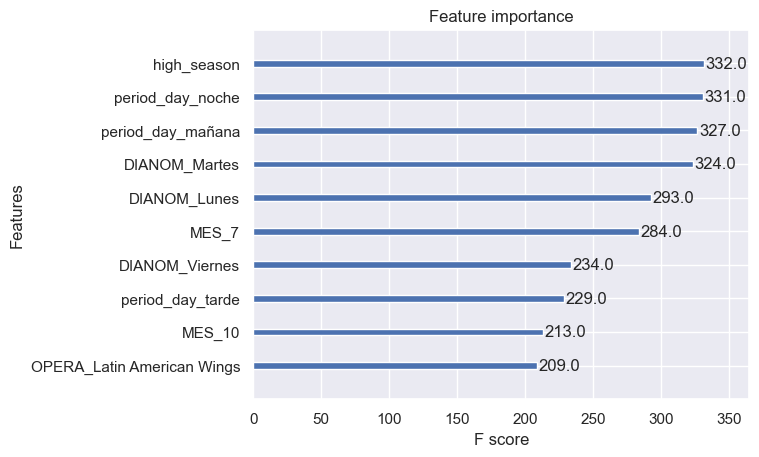

In [96]:
# This uses the weights of the model to determine the most important features
plt.figure(figsize = (12,6))
plot_importance(xgb_model, max_num_features=10)

In [90]:
# This uses the gain of the model to determine the most important features
# Besides, using this method, we can obtain the feature names

# Obtain the feature importances from the model
importances = xgb_model.feature_importances_

# Obtain the indexes of the sorted importances
sorted_idx = np.argsort(importances)[::-1][:10]

# Obtain feature names
feature_names = x_train.columns

# Obtain top 10 features
top_10_features = [feature_names[i] for i in sorted_idx]

for i, idx in enumerate(sorted_idx):
    print(f"Feature {i+1}: {feature_names[idx]} - Importance: {importances[idx]}")

Feature 1: TIPOVUELO_I - Importance: 0.11225465685129166
Feature 2: OPERA_Copa Air - Importance: 0.08992034941911697
Feature 3: OPERA_Gol Trans - Importance: 0.0815478190779686
Feature 4: OPERA_Latin American Wings - Importance: 0.059390757232904434
Feature 5: OPERA_Avianca - Importance: 0.058260057121515274
Feature 6: OPERA_Qantas Airways - Importance: 0.04786081612110138
Feature 7: OPERA_Air Canada - Importance: 0.0456855334341526
Feature 8: SIGLADES_Ciudad de Mexico - Importance: 0.040055207908153534
Feature 9: OPERA_American Airlines - Importance: 0.038658443838357925
Feature 10: MES_12 - Importance: 0.03838100656867027


In [ ]:
"""
top_10_features = [
    "OPERA_Latin American Wings", 
    "MES_7",
    "MES_10",
    "OPERA_Grupo LATAM",
    "MES_12",
    "TIPOVUELO_I",
    "MES_4",
    "MES_11",
    "OPERA_Sky Airline",
    "OPERA_Copa Air"
]
"""

### Data Balance

In [98]:
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0/n_y1
print(scale)

4.4402380952380955


## 6. Training with Improvement

### 6.a. Data Split

In [99]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_10_features], target, test_size = 0.33, random_state = 42)

### 6.b. Model Selection

#### 6.b.i. XGBoost with Feature Importance and with Balance

In [100]:
xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale)
xgb_model_2.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [101]:
xgboost_y_preds_2 = xgb_model_2.predict(x_test2)

In [102]:
confusion_matrix(y_test2, xgboost_y_preds_2)

array([[10352,  7942],
       [ 1603,  2611]], dtype=int64)

In [103]:
print(classification_report(y_test2, xgboost_y_preds_2))

              precision    recall  f1-score   support

           0       0.87      0.57      0.68     18294
           1       0.25      0.62      0.35      4214

    accuracy                           0.58     22508
   macro avg       0.56      0.59      0.52     22508
weighted avg       0.75      0.58      0.62     22508



#### 6.b.ii. XGBoost with Feature Importance but without Balance

In [104]:
xgb_model_3 = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model_3.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [105]:
xgboost_y_preds_3 = xgb_model_3.predict(x_test2)

In [106]:
confusion_matrix(y_test2, xgboost_y_preds_3)

array([[18287,     7],
       [ 4196,    18]], dtype=int64)

In [107]:
print(classification_report(y_test2, xgboost_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.72      0.00      0.01      4214

    accuracy                           0.81     22508
   macro avg       0.77      0.50      0.45     22508
weighted avg       0.80      0.81      0.73     22508



#### 6.b.iii. Logistic Regression with Feature Importante and with Balance

In [108]:
reg_model_2 = LogisticRegression(class_weight={1: n_y0/len(y_train), 0: n_y1/len(y_train)})
reg_model_2.fit(x_train2, y_train2)

LogisticRegression(class_weight={0: 0.18381548426626987, 1: 0.8161845157337302})

In [109]:
reg_y_preds_2 = reg_model_2.predict(x_test2)

In [110]:
confusion_matrix(y_test2, reg_y_preds_2)

array([[10367,  7927],
       [ 1604,  2610]], dtype=int64)

In [111]:
print(classification_report(y_test2, reg_y_preds_2))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69     18294
           1       0.25      0.62      0.35      4214

    accuracy                           0.58     22508
   macro avg       0.56      0.59      0.52     22508
weighted avg       0.75      0.58      0.62     22508



#### 6.b.iv. Logistic Regression with Feature Importante but without Balance

In [112]:
reg_model_3 = LogisticRegression()
reg_model_3.fit(x_train2, y_train2)

LogisticRegression()

In [113]:
reg_y_preds_3 = reg_model_3.predict(x_test2)

In [114]:
confusion_matrix(y_test2, reg_y_preds_3)

array([[18252,    42],
       [ 4141,    73]], dtype=int64)

In [115]:
print(classification_report(y_test2, reg_y_preds_3))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18294
           1       0.63      0.02      0.03      4214

    accuracy                           0.81     22508
   macro avg       0.72      0.51      0.47     22508
weighted avg       0.78      0.81      0.74     22508



## 7. Data Science Conclusions

By looking at the results of the 6 trained models, it can be determined:
- There is no noticeable difference in results between XGBoost and LogisticRegression.
- Does not decrease the performance of the model by reducing the features to the 10 most important.
- Improves the model's performance when balancing classes, since it increases the recall of class "1".

**With this, the model to be productive must be the one that is trained with the top 10 features and class balancing, but which one?**